In [39]:
import pandas as pd
import numpy as np
import warnings 
warnings.filterwarnings('ignore')
#kMeans is available in the sklearn.cluster module
from sklearn.cluster import KMeans
import seaborn as sns
sns.set()


In [40]:
'''
here we will be learning about the Kmeans clustering on the drivers data
we want to study the drivers driving history to peanilise or provide incentives based 
on the history
'''

'\nhere we will be learning about the Kmeans clustering on the drivers data\nwe want to study the drivers driving history to peanilise or provide incentives based \non the history\n'

In [92]:
driversData_original = pd.read_csv('/Users/uday_kumar_swamy/Library/CloudStorage/OneDrive-Personal/datascience_videos/machinelearningpractice/machinelearning/dataset/driver-data.csv')

In [93]:
driversData_original.head(5)

,id,mean_dist_day,mean_over_speed_perc
0,3423311935,71.24,28
1,3423313212,52.53,25
2,3423313724,64.54,27
3,3423311373,55.69,22
4,3423310999,54.58,25


In [94]:
#check the shape of the data
driversData_original.shape

(4000, 3)

In [95]:
#check the info of the data
#i dont see any missing values and no need to label encode also as all of them are numberic
driversData_original.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 3 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    4000 non-null   int64  
 1   mean_dist_day         4000 non-null   float64
 2   mean_over_speed_perc  4000 non-null   int64  
dtypes: float64(1), int64(2)
memory usage: 93.9 KB


In [96]:
#ommit the ID field as this would not help us in the process
driversData = driversData_original.drop(columns=['id'],axis=1)

In [97]:
#check the stat 
driversData.describe().round(2)

,mean_dist_day,mean_over_speed_perc
count,4000.00,4000.00
mean,76.04,10.72
std,53.47,13.71
min,15.52,0.00
25%,45.25,4.00
50%,53.33,6.00
75%,65.63,9.00
max,244.79,100.00


In [98]:
#as we can see above the scaling varies in min max 244, 15 and 0, 100 in another so we need to scale them 
#uniformly this applies to all the algorithms supervised or unsupervised
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
driversData = scaler.fit_transform(driversData)

In [99]:
kmeans = KMeans(n_clusters=2)
kmeans.fit(driversData)

KMeans(n_clusters=2)

In [100]:
#now lets extract the lable
kmeans.labels_

array([0, 0, 0, ..., 1, 1, 1], dtype=int32)

In [101]:
#to check the centroids
#these are the scalled values as we have already scalled the data
kmeans.cluster_centers_

array([[-0.48581565, -0.13816168],
       [ 1.94630276,  0.55351131]])

In [102]:
#to get the WCSS or inertia
kmeans.inertia_

3911.926390428416

In [103]:
#to get the number of members in each cluster
labels , numbers = np.unique(kmeans.labels_,return_counts=True)
labels , numbers

(array([0, 1], dtype=int32), array([3201,  799]))

In [104]:
#identifiying the correct value of K
k_values = [i for i in range(1,11)]
wss = []
for k in k_values:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(driversData)
    wss.append(kmeans.inertia_)
    

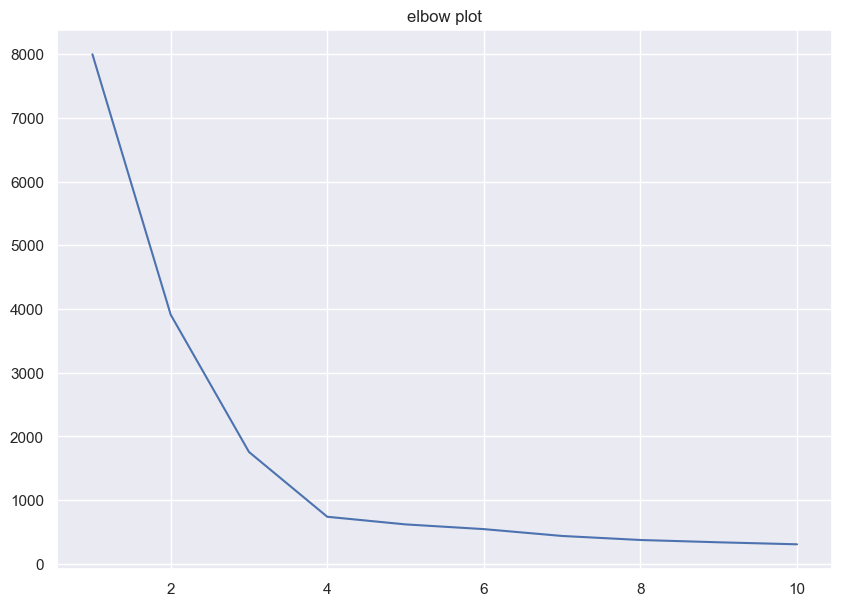

In [105]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,7))
sns.lineplot(k_values,wss)
plt.title('elbow plot')
plt.show()
#clearly we can see the elbow drop in 4


In [106]:
k_means = KMeans(n_clusters=4)
k_means.fit(driversData)

KMeans(n_clusters=4)

In [107]:
driversData_original['label'] = k_means.labels_

In [108]:
driversData_original.head(50)

,id,mean_dist_day,mean_over_speed_perc,label
0,3423311935,71.24,28,3
1,3423313212,52.53,25,3
2,3423313724,64.54,27,3
3,3423311373,55.69,22,3
4,3423310999,54.58,25,3
5,3423313857,41.91,10,0
6,3423312432,58.64,20,3
7,3423311434,52.02,8,0
8,3423311328,31.25,34,3
9,3423312488,44.31,19,3


In [111]:
driversData=driversData_original.drop(columns=['id'],axis=1)

In [112]:
driversData

,mean_dist_day,mean_over_speed_perc,label
0,71.24,28,3
1,52.53,25,3
2,64.54,27,3
3,55.69,22,3
4,54.58,25,3
...,...,...,...
3995,160.04,10,1
3996,176.17,5,1
3997,170.91,12,1
3998,176.14,5,1


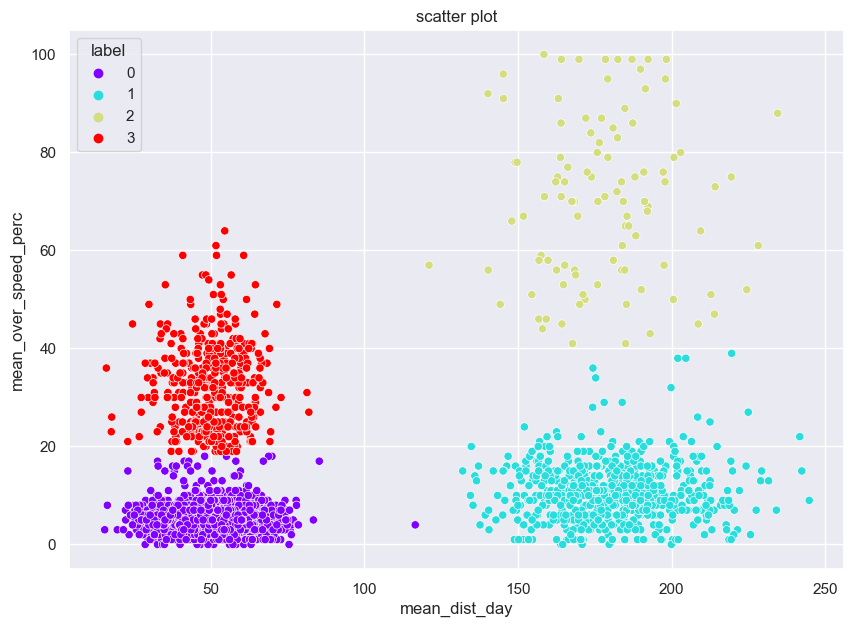

In [115]:
plt.figure(figsize=(10,7))
sns.scatterplot(data=driversData,x = 'mean_dist_day', y='mean_over_speed_perc', hue='label',palette='rainbow')
plt.title('scatter plot')
plt.show()

In [116]:
#cluster profiling
driversData.groupby('label').mean()

,mean_dist_day,mean_over_speed_perc
label,,
0,50.016637,5.204037
1,180.434863,10.529496
2,177.835096,70.288462
3,50.404824,32.365340
